In [1]:
!pip install matplotlib Pillow



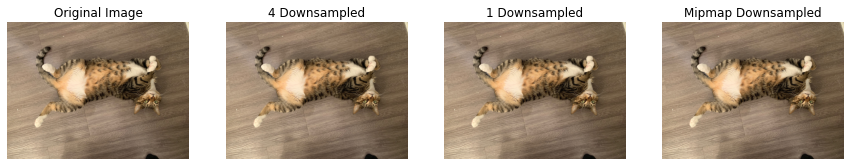

In [2]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

def downsample_image(image_path, methods, scale_factors):
    # Load the original image
    original_image = Image.open(image_path)
    plt.figure(figsize=(15, 10))
    
    # Display the original image
    plt.subplot(1, len(methods) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')
    
    for i, (method, scale_factor) in enumerate(zip(methods, scale_factors), start=2):
        # Downsample the image
        if method == 'Mipmap':
            # Simulating Mipmap by manually resizing in steps
            tmp_image = original_image
            for _ in range(scale_factor):
                tmp_image = tmp_image.resize((tmp_image.width // 2, tmp_image.height // 2), Image.ANTIALIAS)
            downsampled_image = tmp_image
        else:
            # Directly resizing using Box and Lanczos methods
            target_size = (original_image.width // scale_factor, original_image.height // scale_factor)
            downsampled_image = original_image.resize(target_size, method)
        
        # Display the downsampled image
        plt.subplot(1, len(methods) + 1, i)
        plt.imshow(downsampled_image)
        plt.title(f'{method} Downsampled')
        plt.axis('off')

# Define the methods and scale factors
methods = [Image.BOX, Image.LANCZOS, 'Mipmap']
scale_factors = [2, 2, 2]  # Example scale factor for demonstration

downsample_image('Down Sample Image.jpg', methods, scale_factors)
plt.show()


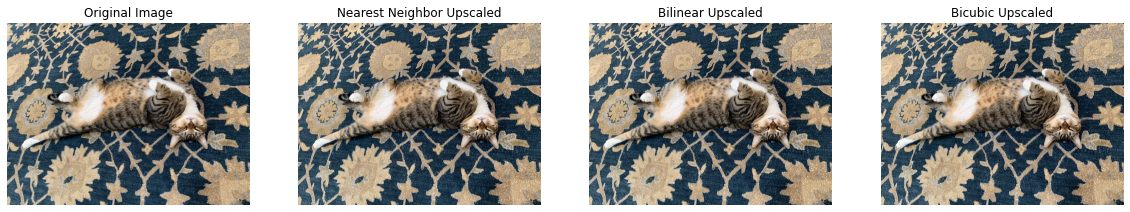

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

def upscale_image(image_path, methods, upscale_factor):
    # Load the original image
    original_image = Image.open(image_path)
    original_size = original_image.size
    upscaled_size = (int(original_size[0] * upscale_factor), int(original_size[1] * upscale_factor))

    plt.figure(figsize=(20, 15))
    
    # Display the original image for reference
    plt.subplot(1, len(methods) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')
    
    for i, (method, method_name) in enumerate(methods, start=2):
        # Upscale the image using the specified method
        upscaled_image = original_image.resize(upscaled_size, method)
        
        # Display the upscaled image
        plt.subplot(1, len(methods) + 1, i)
        plt.imshow(upscaled_image)
        plt.title(f'{method_name} Upscaled')
        plt.axis('off')

# Define the methods for upscaling with their names for display
methods = [
    (Image.NEAREST, "Nearest Neighbor"),
    (Image.BILINEAR, "Bilinear"),
    (Image.BICUBIC, "Bicubic")
    # For Generalized Bicubic, we'll use BICUBIC as PIL does not have a separate method for it.
    # If you need true generalized bicubic interpolation, additional libraries or custom implementations are required.
]

upscale_factor = 2  # Example scale factor for demonstration

upscale_image('Up_Sample_Image.jpg', methods, upscale_factor)
plt.show()
